In [1]:
import os, sys, time, glob, warnings
from os.path import join as joindir
from IPython.display import clear_output
from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors
import numpy as np, pandas as pd, xarray as xr
from numpy import datetime64 as dt64, timedelta64 as td64

warnings.filterwarnings('ignore')

def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')
def day_of_month_to_string(d): return str(d) if d > 9 else '0' + str(d)

In [2]:
ds_prof=xr.open_dataset("../data/osb_ctd_jul21_temperature.nc")
ds_roms=xr.open_dataset("../data/roms_osb_july_2021.nc")
#prof_temp = ds_prof.temperature.values


In [3]:
ds_roms

<xarray.Dataset>
Dimensions:        (ocean_time: 745, s_w: 31, s_rho: 30)
Coordinates:
    lat_rho        float64 ...
    lat_u          float64 ...
    lat_v          float64 ...
    lon_rho        float64 ...
    lon_u          float64 ...
    lon_v          float64 ...
  * ocean_time     (ocean_time) datetime64[ns] 2021-07-01 ... 2021-08-01
  * s_rho          (s_rho) float64 -0.9833 -0.95 -0.9167 ... -0.05 -0.01667
  * s_w            (s_w) float64 -1.0 -0.9667 -0.9333 ... -0.06667 -0.03333 0.0
Data variables: (12/38)
    AKs            (ocean_time, s_w) float32 ...
    AKv            (ocean_time, s_w) float32 ...
    Cs_r           (s_rho) float64 ...
    Cs_w           (s_w) float64 ...
    Ldetritus      (ocean_time, s_rho) float32 ...
    NO3            (ocean_time, s_rho) float32 ...
    ...             ...
    vbar           (ocean_time) float32 ...
    w              (ocean_time, s_w) float32 ...
    zeta           (ocean_time) float32 ...
    zooplankton    (ocean_time, s_rho) float32 ...
    z_rho          (ocean_time, s_rho) float64 ...
    z_w            (ocean_time, s_w) float64 ...
Attributes: (12/43)
    file:                   /gscratch/macc/parker/LiveOcean_roms/output/cas6_...
    format:                 netCDF-4
    Conventions:            CF-1.4, SGRID-0.3
    type:                   ROMS/TOMS history file
    title:                  First LiveOcean input file
    var_info:               /gscratch/macc/parker/LiveOcean_roms/LO_ROMS/ROMS...
    ...                     ...
    ana_file:               ROMS/Functionals/ana_btflux.h, ROMS/Functionals/a...
    bio_file:               ROMS/Nonlinear/Biology/npzd2o_banas.h
    CPP_options:            LO8B, ADD_FSOBC, ADD_M2OBC, ANA_BPFLUX, ANA_BSFLU...
    NCO:                    netCDF Operators version 4.9.8 (Homepage = http:/...
    nco_input_file_number:  8761
    nco_input_file_list:    moor_temp_000000.nc moor_temp_000001.nc moor_temp...

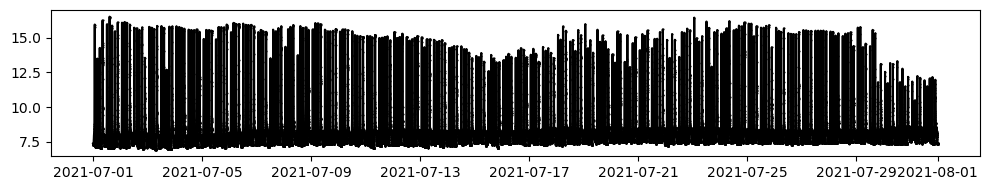

In [4]:
# Select a variable (e.g., temp) from the profiler and make time series
fig1, ax = plt.subplots(1, 1, figsize=(10,2), tight_layout=True)

ax.plot(ds_prof.time, ds_prof.temperature, marker='.', markersize=1., color='k')

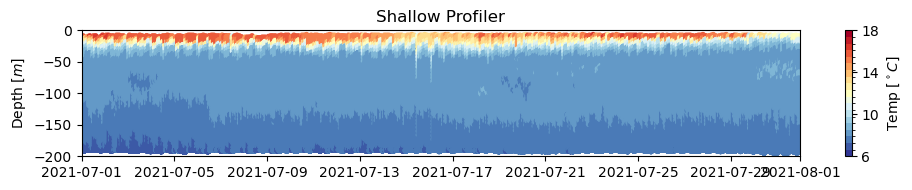

In [5]:
# Color plot for profiler
import matplotlib as mpl
cmap_t = mpl.cm.RdYlBu_r
bound_t = np.linspace(6,18,20)
norm = mpl.colors.BoundaryNorm(bound_t, cmap_t.N)

fig1c, ax = plt.subplots(1, 1, figsize=(10,2), tight_layout=True)

im1 = ax.scatter(ds_prof.time, ds_prof.z, s=10, c=ds_prof.temperature, cmap=cmap_t, marker='o', norm=norm)
ax.set(ylim = (-200., 0.))
ax.set(xlim = (ds_prof.time[0], ds_prof.time[-1]), ylim = (-200., 0.))
ax.set_ylabel('Depth [$m$]', size=10)
ax.set_title('Shallow Profiler', size=12)

cbar = fig1c.colorbar(im1, orientation='vertical')
cbar.set_ticks([6,10,14,18])
cbar.set_label('Temp $[^\circ C]$', fontsize=10)

#fig1c.savefig('./Figs/osb_july_temp.png', dpi=300, bbox_inches='tight') 

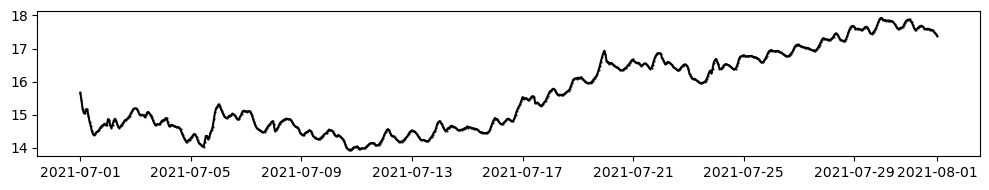

In [6]:
# Plot time series for a ROMS variable (e.g. temp)
fig2, ax = plt.subplots(1, 1, figsize=(10,2), tight_layout=True)

# the -1 means surface values (order 0...-1 is from seafloor to surface)
ax.plot(ds_roms.ocean_time, ds_roms.temp[:,-1], marker='.', markersize=1., color='k')

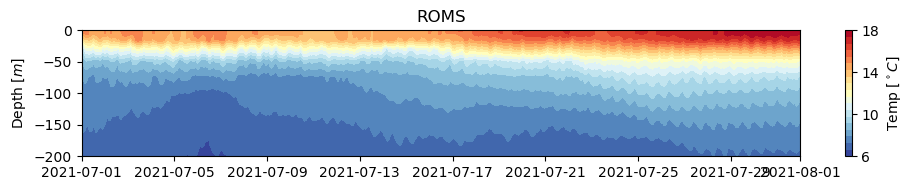

In [7]:
# Contour plot for ROMS output
Ot, Srho = np.meshgrid(ds_roms.ocean_time, ds_roms.s_rho, indexing='ij')

fig2c, ax = plt.subplots(1, 1, figsize=(10,2), tight_layout=True)

im2 = ax.contourf(Ot, ds_roms.z_rho, ds_roms.temp, bound_t, cmap=cmap_t)
ax.set(ylim = (-200., 0.))
ax.set_ylabel('Depth [$m$]', size=10)
ax.set_title('ROMS', size=12)

cbar = fig2c.colorbar(im2, orientation='vertical')
cbar.set_ticks([6,10,14,18])
cbar.set_label(r'Temp $[^\circ C]$', fontsize=10)

fig2c.savefig('./Figs/roms_july_temp.png', dpi=300, bbox_inches='tight') 